In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('gpx4s_results.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df = df.rename(columns={'Unnamed: 0': 'Gene'})

In [5]:
df.sort_values(by='padj', inplace=True) # To have the most significant genes at the very top, in ascending order, which means that the value increases with each step of the row

In [6]:
df['-log10pvalue'] = -np.log10(df.pvalue)
df['-log10padj'] = -np.log10(df.padj)

In [7]:
df.head()

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10pvalue,-log10padj
12296,ENSG00000169047,1399.393947,-3.432867,0.095681,-35.878232,6.676192e-282,9.711857e-278,281.175471,277.012698
9945,ENSG00000157303,1336.801055,-3.648575,0.107950,-33.798773,2.055755e-250,1.495254e-246,249.687029,245.825285
16207,ENSG00000196208,3760.632497,-3.528330,0.108441,-32.536844,3.213995e-232,1.558466e-228,231.492955,227.807303
4348,ENSG00000115221,695.112082,6.218416,0.198153,31.381824,3.581975e-216,1.302675e-212,215.445877,211.885164
3937,ENSG00000111859,1739.361186,4.653198,0.155301,29.962372,3.036073e-197,8.833150e-194,196.517688,193.053884


In [8]:
# sgs stands for significant genes, i.e the genes that were differentially expressed
# alpha is the significance value/threshold 
alpha = 0.05
sgs_mask = df['-log10padj'] > -np.log10(alpha)

In [9]:
sgs_mask.value_counts()

-log10padj
True     8181
False    6366
Name: count, dtype: int64

In [10]:
# Looking for genes where the expression is double or greater.
# gdge stands for genes with doubled or greater expression
gdge = df[df.log2FoldChange >= 1].Gene

In [11]:
# Filtering out genes where the expression is half or lesser.
# ghle stands for genes with halved or lesser expression
ghle = df[df.log2FoldChange <= -1].Gene

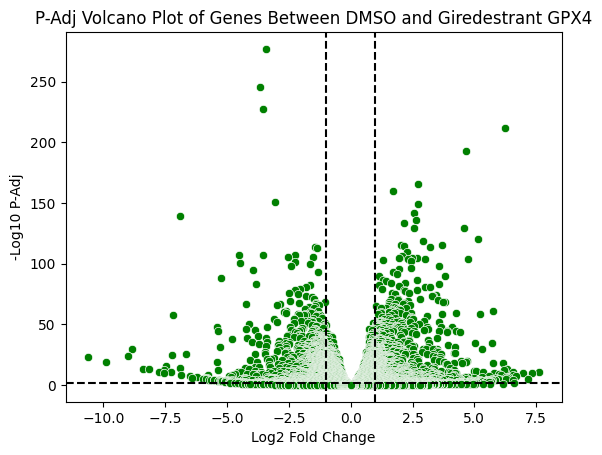

In [12]:
# To see the genes that are both statistically significant and that meaningful expression (either +ve or -ve)
sns.scatterplot(data = df, x='log2FoldChange', y='-log10padj', color='green')
plt.title('P-Adj Volcano Plot of Genes Between DMSO and Giredestrant GPX4')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-Adj')
plt.axhline(-np.log10(alpha), linestyle='--', color='black') # All the genes above the horizontal line are significant and differentially expressed
plt.axvline(1, linestyle='--', color='black') # To see the genes whose expression was double or greater (log2foldchange >= 1)
plt.axvline(-1, linestyle='--', color='black') # To see the genes whose expression was half or lesser  (log2foldchange <= -1)
plt.show()

#### 'Base Mean vs log2FoldChange'

In [13]:
df['log10basemean'] = np.log10(df.baseMean) # To scale the values down so they can be more interpretable

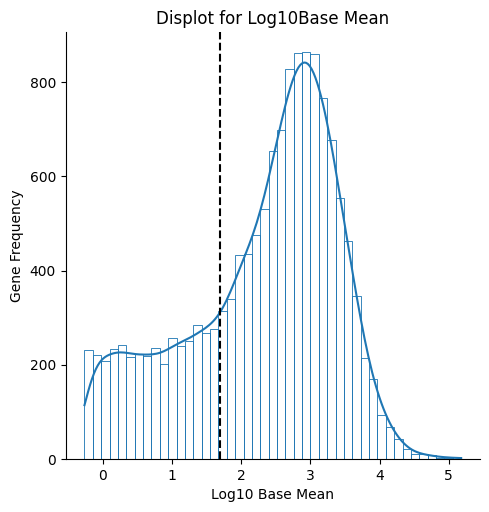

In [14]:
sns.displot(df.log10basemean, kde=True, fill=False)
plt.title('Displot for Log10Base Mean')
plt.xlabel('Log10 Base Mean')
plt.ylabel('Gene Frequency')
plt.axvline(1.7, linestyle='--', color='black') # The line is the threshold I picked
plt.show()

In [15]:
# Selecting the basemean threshold
basemean_thresh = 1.7

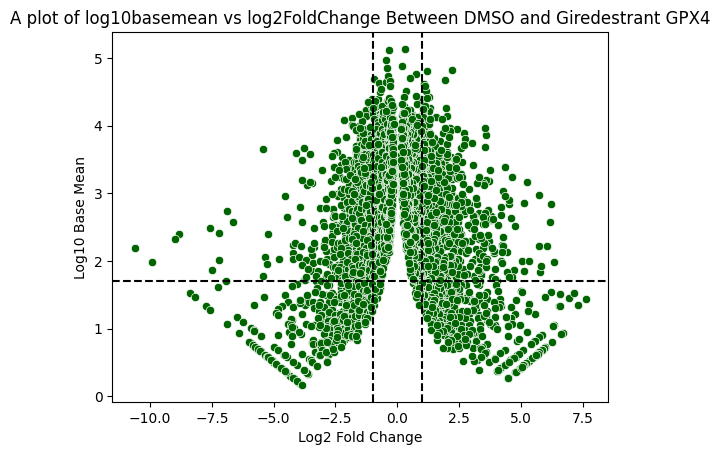

In [16]:
sns.scatterplot(data=df[sgs_mask], x='log2FoldChange', y='log10basemean', color='darkgreen') # The data is for only the significant genes
plt.title('A plot of log10basemean vs log2FoldChange Between DMSO and Giredestrant GPX4')
plt.xlabel('Log2 Fold Change')
plt.ylabel('Log10 Base Mean')
plt.axhline(basemean_thresh, linestyle='--', color='black') # The genes above the vertical line have avg counts higher than the threshold (across all samples)
plt.axvline(1, linestyle='--', color='black') # Expression was doubled or more (log2foldchange >= 1)
plt.axvline(-1, linestyle='--', color='black') # Expression was halved or lower  (log2foldchange <= -1)
plt.show()

#### 'lfcSE vs log2FoldChange'

In [17]:
df.lfcSE.describe()

count    14547.000000
mean         0.439149
std          0.663624
min          0.047820
25%          0.103125
50%          0.153364
75%          0.390227
max          3.456128
Name: lfcSE, dtype: float64

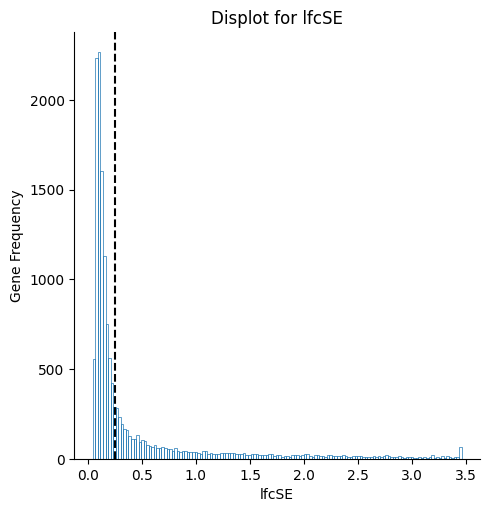

In [18]:
sns.displot(df.lfcSE, fill=False)
plt.title('Displot for lfcSE')
plt.ylabel('Gene Frequency')
plt.axvline(0.25, linestyle='--', color='black') # The line is the threshold I picked
plt.show()

In [19]:
lfcSE_thresh = 0.25

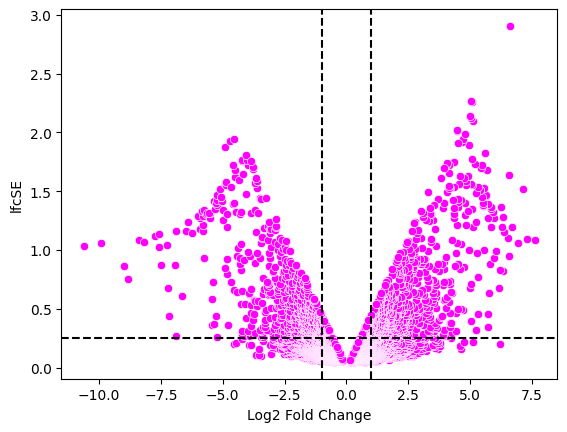

In [20]:
sns.scatterplot(data=df[sgs_mask], x='log2FoldChange', y='lfcSE', color='magenta')
plt.xlabel('Log2 Fold Change')
plt.axhline(lfcSE_thresh, linestyle='--', color='black') # The genes below the horizontal line have low variability, i.e the standard error for each of them is low
plt.axvline(1, linestyle='--', color='black') # Expression was doubled or more (log2foldchange >= 1)
plt.axvline(-1, linestyle='--', color='black') # Expression was halved or lower  (log2foldchange <= -1)
plt.show()

In [21]:
# To find genes that have high log2FoldChange and low lfcSE
# lvlfc stands for low variablity, large fold change
# The fold change can be positive or negative, as long as it is substantial
lvlfc = df[(df.lfcSE <= 0.25) & ((df.log2FoldChange >= 1) | (df.log2FoldChange <= -1))]
lvlfc.Gene

12296    ENSG00000169047
9945     ENSG00000157303
16207    ENSG00000196208
4348     ENSG00000115221
3937     ENSG00000111859
              ...       
2727     ENSG00000103034
4017     ENSG00000112320
14689    ENSG00000182359
11956    ENSG00000167644
2561     ENSG00000101850
Name: Gene, Length: 1519, dtype: object

In [22]:
# degwgcie stands for 'Differentially expressed genes with great changes in expression (The changes in expression refer to log2foldchange <= -1 and log2foldchange >= 1)'
degwgcie_df = df[(df.padj < alpha) & ((df.log2FoldChange <= -1) | (df.log2FoldChange >= 1))]

In [23]:
degwgcie_df

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10pvalue,-log10padj,log10basemean
12296,ENSG00000169047,1399.393947,-3.432867,0.095681,-35.878232,6.676192e-282,9.711857e-278,281.175471,277.012698,3.145940
9945,ENSG00000157303,1336.801055,-3.648575,0.107950,-33.798773,2.055755e-250,1.495254e-246,249.687029,245.825285,3.126067
16207,ENSG00000196208,3760.632497,-3.528330,0.108441,-32.536844,3.213995e-232,1.558466e-228,231.492955,227.807303,3.575261
4348,ENSG00000115221,695.112082,6.218416,0.198153,31.381824,3.581975e-216,1.302675e-212,215.445877,211.885164,2.842055
3937,ENSG00000111859,1739.361186,4.653198,0.155301,29.962372,3.036073e-197,8.833150e-194,196.517688,193.053884,3.240390
...,...,...,...,...,...,...,...,...,...,...
4937,ENSG00000119917,183.380537,2.080539,0.941989,2.208666,2.719786e-02,4.851238e-02,1.565465,1.314147,2.263353
15153,ENSG00000184613,182.588600,-1.689377,0.765562,-2.206715,2.733395e-02,4.872282e-02,1.563298,1.312268,2.261474
5267,ENSG00000122859,1.468791,-3.871037,1.758405,-2.201448,2.770436e-02,4.933174e-02,1.557452,1.306874,0.166960
18061,ENSG00000214711,2.447069,3.286160,1.493051,2.200970,2.773815e-02,4.937675e-02,1.556923,1.306477,0.388646


In [24]:
gpx4s_data = pd.read_csv('gpx4s.csv')

In [25]:
# The degwgcie_count_df is for all the counts of the differentially expressed genes with great changes in expression
# To make the order of genes in the new degwgcie_count_df the same as degwgcie_df
degwgcie_count_df = gpx4s_data[gpx4s_data.name.isin(degwgcie_df.Gene)]
degwgcie_count_df = degwgcie_count_df.set_index('name').loc[degwgcie_df.Gene] # Basically getting (in order) the names of the genes of the smaller degwgcie_df in the larger degwgcie_count_df and arranging the degwgcie_count_df with them

In [26]:
degwgcie_count_df # The indices may have changed, but the genes are in the correct order, arranged from the one with the lowest p-adj to the one with the highest in this dataframe

,dmso_GPX4_1,dmso_GPX4_2,dmso_GPX4_3,dmso_GPX4_4,giredestrant_GPX4_1,giredestrant_GPX4_2,giredestrant_GPX4_3,giredestrant_GPX4_4
name,,,,,,,,
ENSG00000169047,3118,2537,2632,3080,180,205,282,210
ENSG00000157303,3072,2476,2597,2835,125,184,238,186
ENSG00000196208,7544,7054,7325,8716,435,431,711,659
ENSG00000115221,35,15,13,19,1193,1178,1366,1291
ENSG00000111859,125,166,149,143,3204,2575,3527,2922
...,...,...,...,...,...,...,...,...
ENSG00000119917,30,62,114,102,272,40,766,55
ENSG00000184613,294,249,283,417,77,6,182,65
ENSG00000122859,2,3,3,5,0,0,0,0


In [27]:
# Normalizing all the counts with log2(x + 1) to stabilise the variance and make interpretation of the upcoming heatmap easy
normalized = degwgcie_count_df.apply(lambda x: np.log2(x + 1))

In [28]:
normalized.head()

,dmso_GPX4_1,dmso_GPX4_2,dmso_GPX4_3,dmso_GPX4_4,giredestrant_GPX4_1,giredestrant_GPX4_2,giredestrant_GPX4_3,giredestrant_GPX4_4
name,,,,,,,,
ENSG00000169047,11.606868,11.309476,11.362492,11.589183,7.499846,7.686501,8.144658,7.721099
ENSG00000157303,11.585432,11.274378,11.343186,11.469642,6.977280,7.531381,7.900867,7.546894
ENSG00000196208,12.881305,12.784430,12.838810,13.089616,8.768184,8.754888,9.475733,9.366322
ENSG00000115221,5.169925,4.000000,3.807355,4.321928,10.221587,10.203348,10.416798,10.335390
ENSG00000111859,6.977280,7.383704,7.228819,7.169925,11.646109,11.330917,11.784635,11.513234


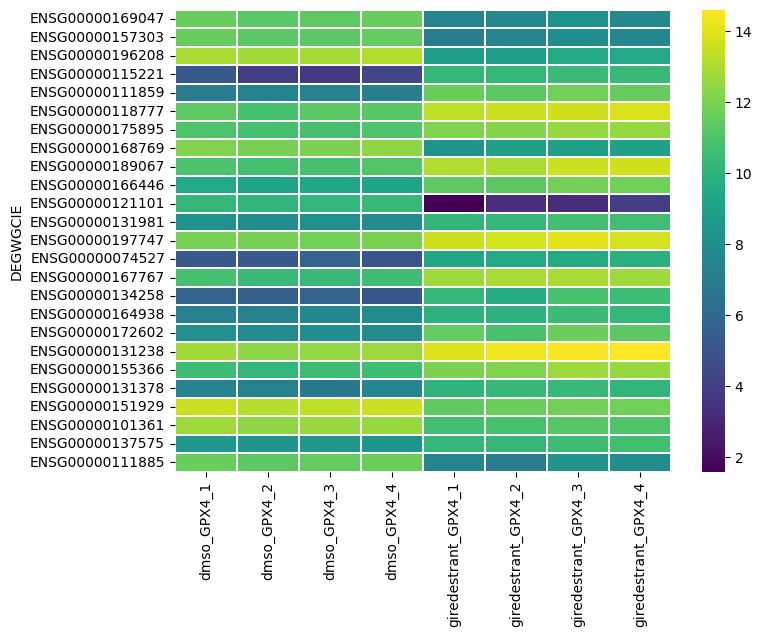

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(normalized.iloc[:25], annot=False, cmap='viridis', linewidths=.01) # To visualise expression in the topmost 25 degwgcie in the dataframe
plt.ylabel('DEGWGCIE')
plt.show()